In [11]:
# Execute this cell
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

from scipy import integrate
from scipy.stats import norm
from scipy.stats import cauchy
from astroML.plotting import hist
from astroML.plotting.mcmc import convert_to_stdev
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)
from astroML.plotting.mcmc import convert_to_stdev
import warnings; warnings.simplefilter('ignore')
import corner
from sklearn.decomposition import FastICA

(35.0, 50.0)

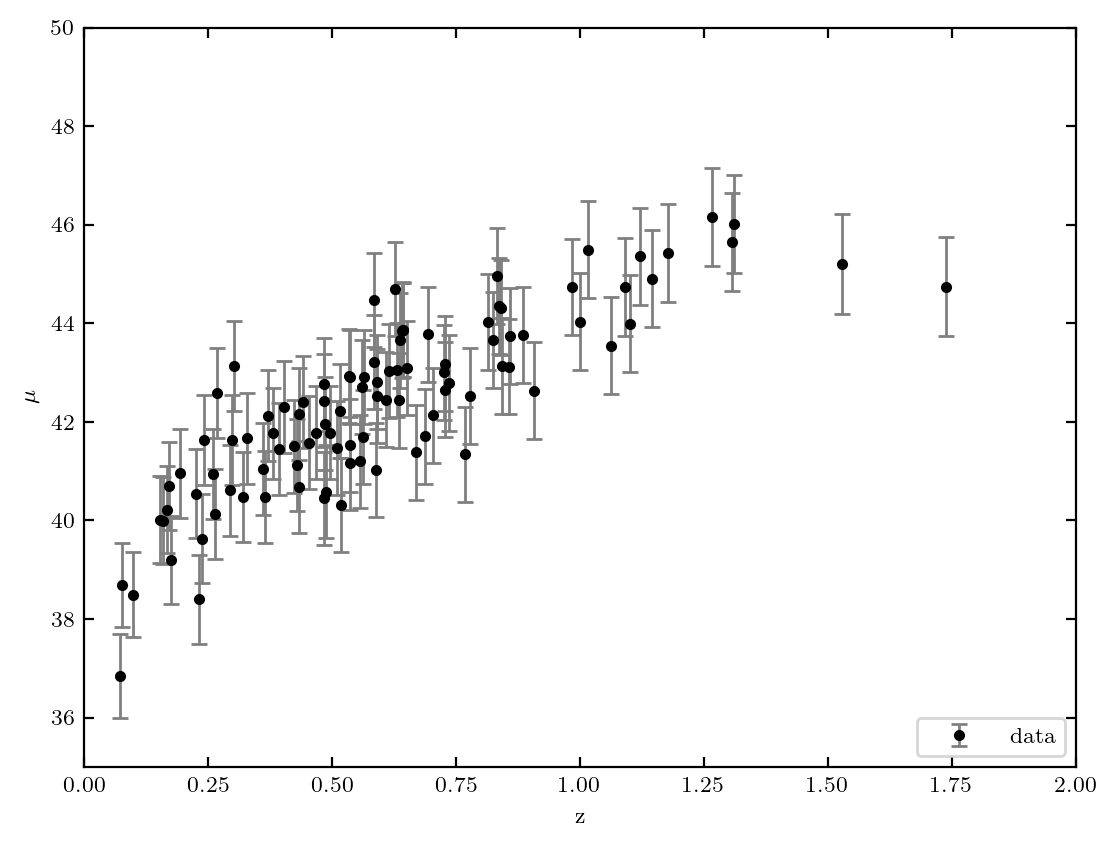

In [12]:
from astroML.datasets import generate_mu_z
z_sample, mu_sample, dmu = generate_mu_z(100, random_state=1234)

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)


fit using linear and polynomial regression

In [13]:
from astroML.linear_model import LinearRegression

xgrid=np.linspace(0, 2, 1000)
print(z_sample.shape, mu_sample.shape, dmu.shape    )
z_sample_= z_sample[:, np.newaxis]  # Reshape to 2D array for sklearn
print(z_sample_.shape, mu_sample.shape, dmu.shape)
model = LinearRegression()
model.fit(z_sample_, mu_sample, dmu)

print(model.coef_)
y_pred = model.predict(xgrid[:, np.newaxis])


(100,) (100,) (100,)
(100, 1) (100,) (100,)
[39.48384602  4.76438865]


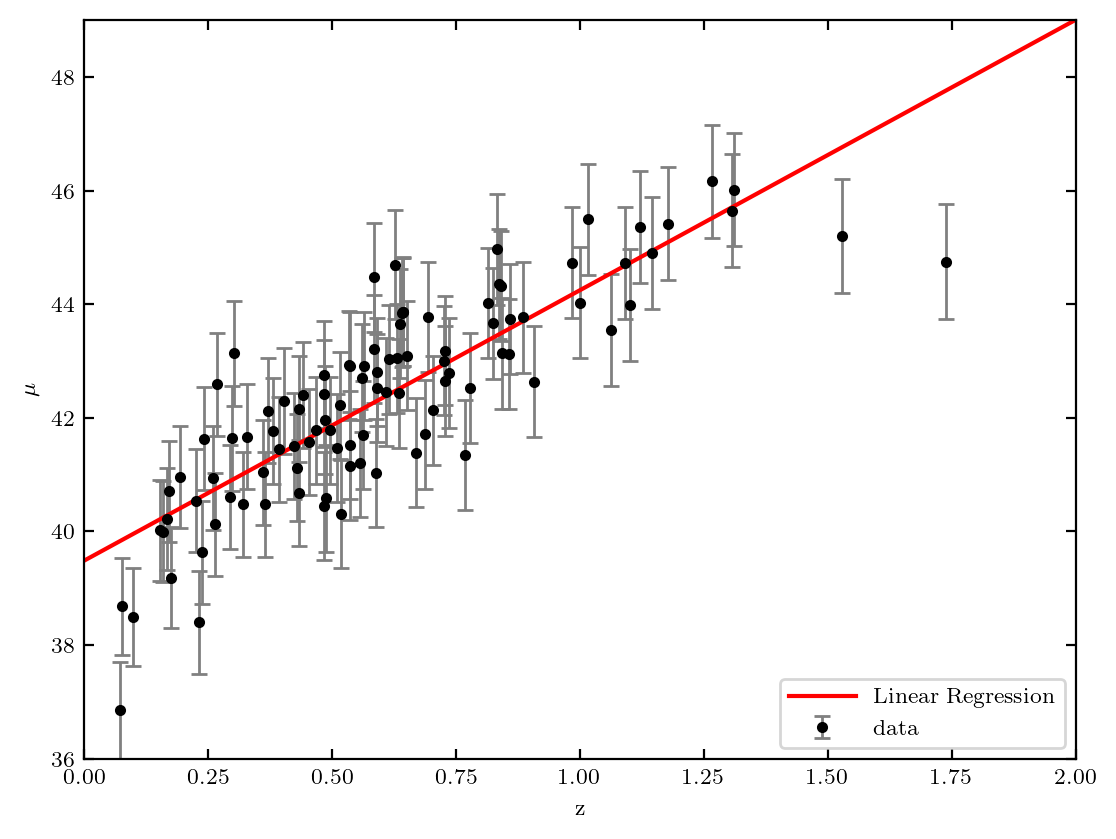

In [14]:
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.plot(xgrid, y_pred, 'r-', label='Linear Regression')
plt.xlabel("z")
plt.ylabel("$\mu$")   
plt.legend(loc='lower right')  

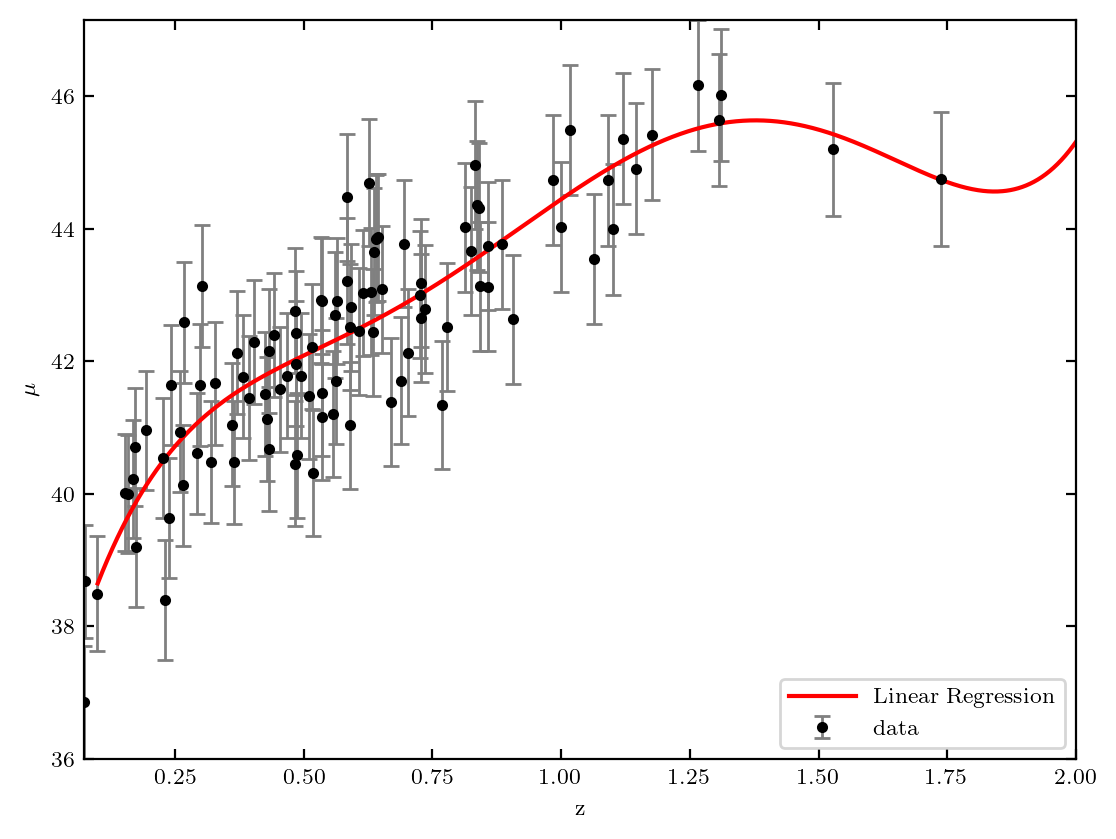

In [15]:

from astroML.linear_model import PolynomialRegression


degree = 5
poly_model = PolynomialRegression(degree) 
poly_model.fit(z_sample_, mu_sample, dmu)


xgrid=np.linspace(0.1, 2, 1000)

y_pred_poly = poly_model.predict(xgrid[:,np.newaxis])
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.plot(xgrid, y_pred_poly, 'r-', label='Linear Regression')
plt.xlabel("z")
plt.ylabel("$\mu$")   
plt.legend(loc='lower right')  


(0.0, 2.0)

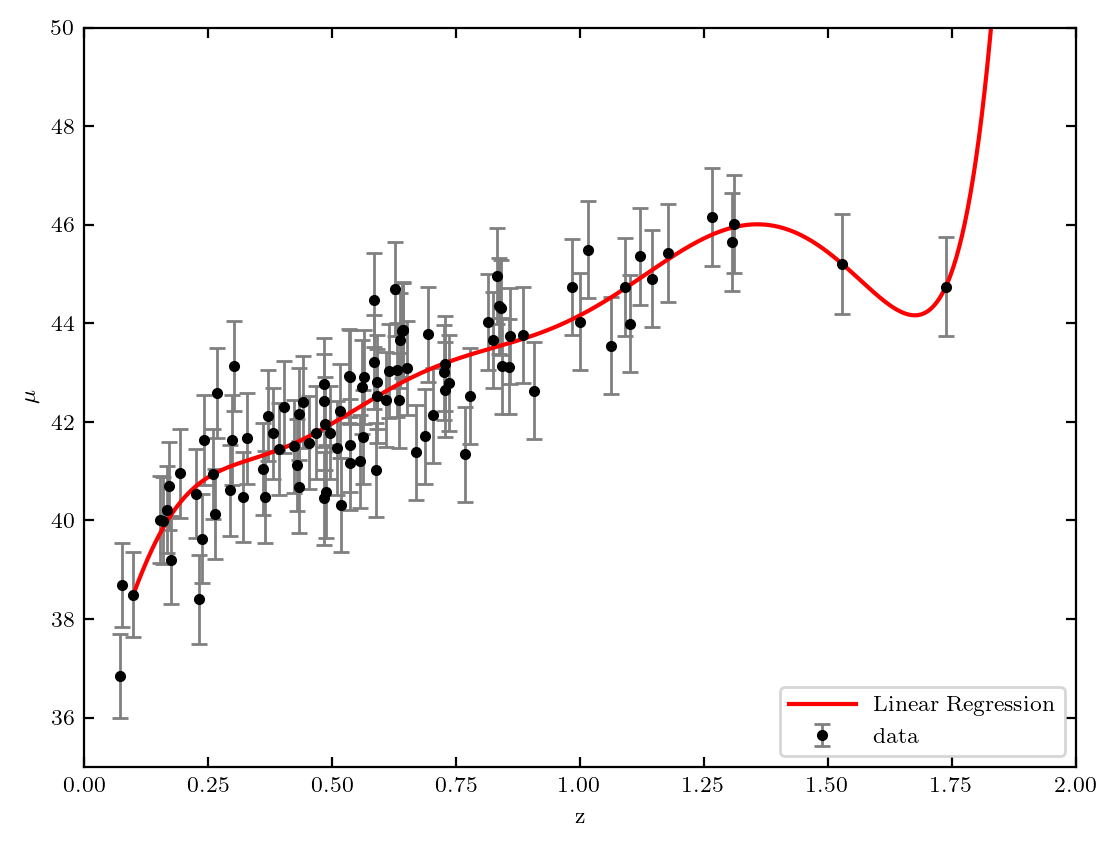

In [16]:
from astroML.linear_model import PolynomialRegression


degree = 10
poly_model = PolynomialRegression(degree) 
poly_model.fit(z_sample_, mu_sample, dmu)


xgrid=np.linspace(0.1, 2, 1000)

y_pred_poly = poly_model.predict(xgrid[:,np.newaxis])
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.plot(xgrid, y_pred_poly, 'r-', label='Linear Regression')
plt.xlabel("z")
plt.ylabel("$\mu$")   
plt.legend(loc='lower right')  
plt.ylim(35,50)
plt.xlim(0,2)

(0.0, 2.0)

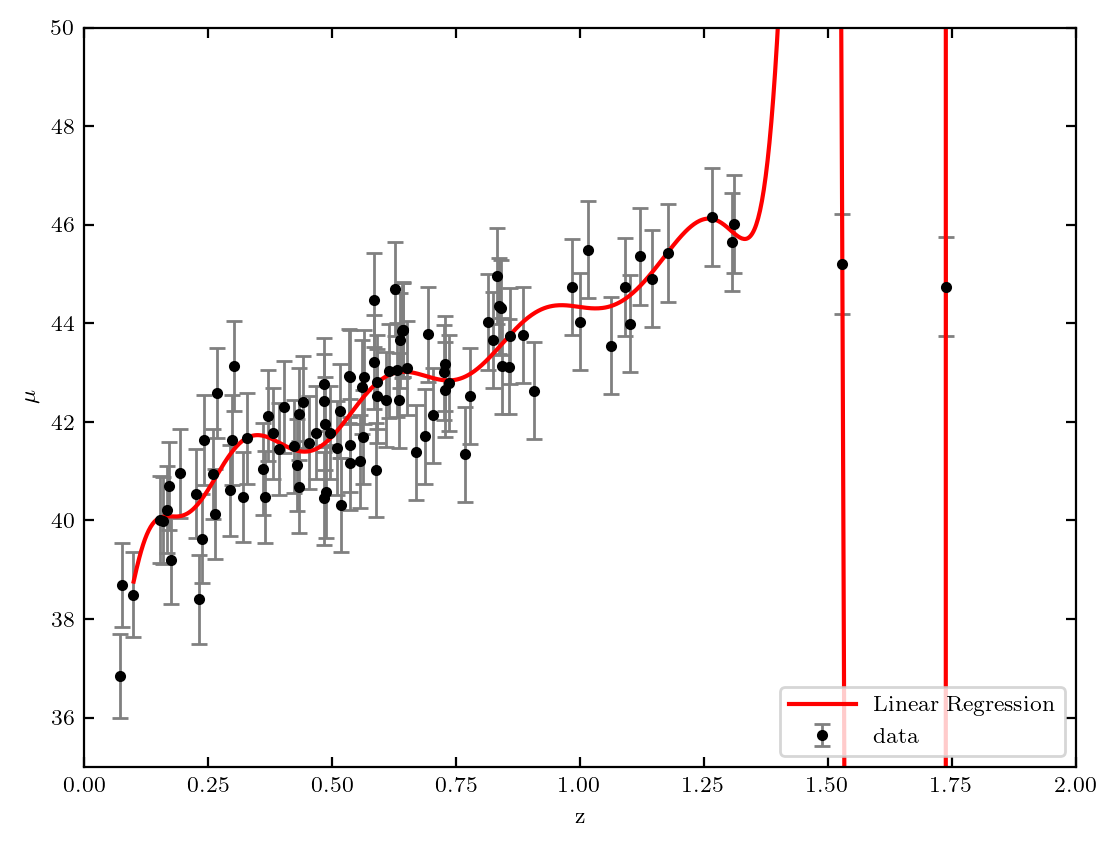

In [17]:
from astroML.linear_model import PolynomialRegression


degree = 20
poly_model = PolynomialRegression(degree) 
poly_model.fit(z_sample_, mu_sample, dmu)


xgrid=np.linspace(0.1, 2, 1000)

y_pred_poly = poly_model.predict(xgrid[:,np.newaxis])
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.plot(xgrid, y_pred_poly, 'r-', label='Linear Regression')
plt.xlabel("z")
plt.ylabel("$\mu$")   
plt.legend(loc='lower right')  
plt.ylim(35,50)
plt.xlim(0,2)

overfitting in the case of degree=20

### Cross Validation

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val, dmu_train, dmu_val = train_test_split(
    z_sample, mu_sample, dmu, test_size=0.1, random_state=42)

In [19]:

from sklearn.preprocessing import  StandardScaler

from sklearn.model_selection import cross_val_predict
from astroML.datasets import generate_mu_z

z_sample, mu_sample, dmu = generate_mu_z(100, random_state=1234)
X = z_sample[:, np.newaxis]  
y = mu_sample





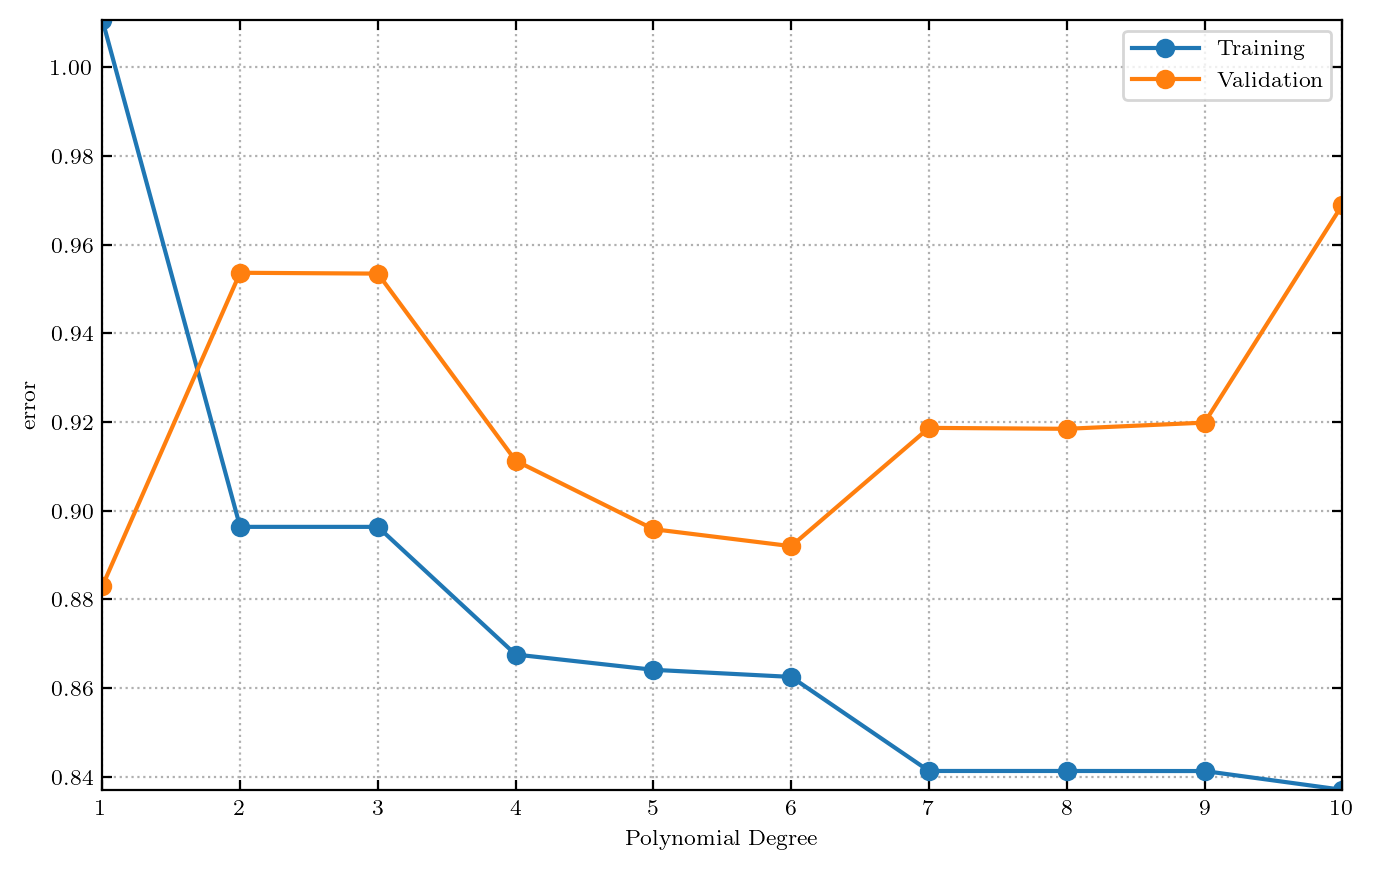

In [20]:
from sklearn.metrics import mean_squared_error
#polynomial regression
X = z_sample_
y = mu_sample
#cross validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

degrees = range(1, 11)
rmse_train = []
rmse_val = []

for degree in degrees:
    model = PolynomialRegression(degree)
    model.fit(X_train_scaled, y_train)
    y_pred_train = model.predict(X_train_scaled)
    y_pred_val = model.predict(X_val_scaled)
    rmse_train.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))
    rmse_val.append(np.sqrt(mean_squared_error(y_val, y_pred_val)))

plt.figure(figsize=(8,5))
plt.plot(degrees, rmse_train, 'o-', label='Training')
plt.plot(degrees, rmse_val, 'o-', label='Validation')
plt.xlabel('Polynomial Degree')
plt.ylabel('error')
plt.legend()
plt.grid()
plt.show()

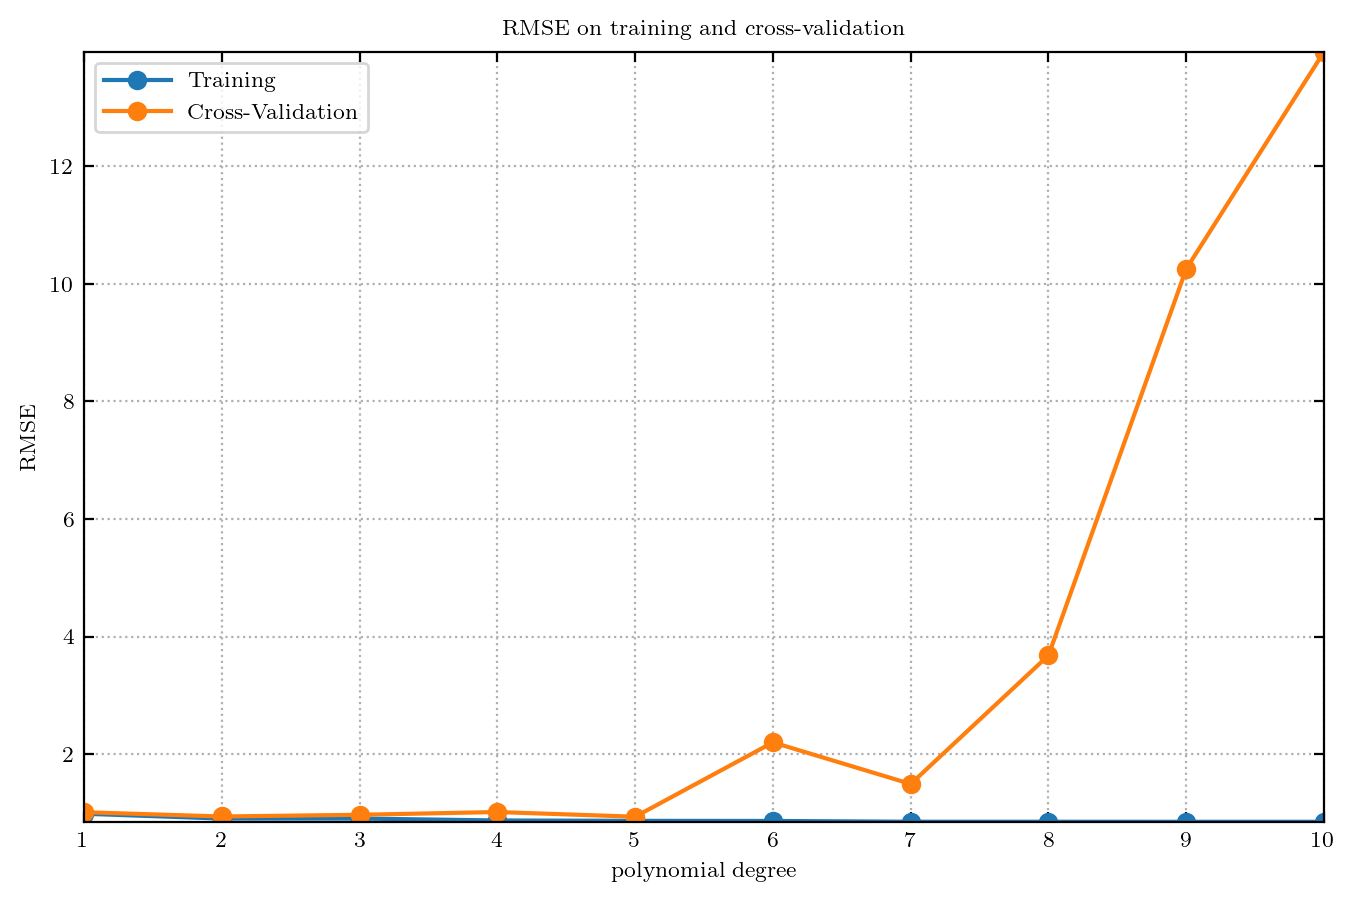

In [21]:
#k fold cross-validation

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict


X = z_sample_
y = mu_sample

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

degrees = range(1, 11)
rmse_cv = []
rmse_train = []

for degree in degrees:
    model = PolynomialRegression(degree)
    model.fit(X_scaled, y)
    y_pred_train = model.predict(X_scaled)
    rmse_train.append(np.sqrt(mean_squared_error(y, y_pred_train)))
    y_pred_cv = cross_val_predict(model, X_scaled, y, cv=10)
    rmse_cv.append(np.sqrt(mean_squared_error(y, y_pred_cv)))

plt.figure(figsize=(8,5))
plt.plot(degrees, rmse_train, 'o-', label='Training')
plt.plot(degrees, rmse_cv, 'o-', label='Cross-Validation')
plt.xlabel('polynomial degree')
plt.ylabel('RMSE')
plt.title('RMSE on training and cross-validation')
plt.legend()
plt.grid()
plt.show()



kernel regrssion:

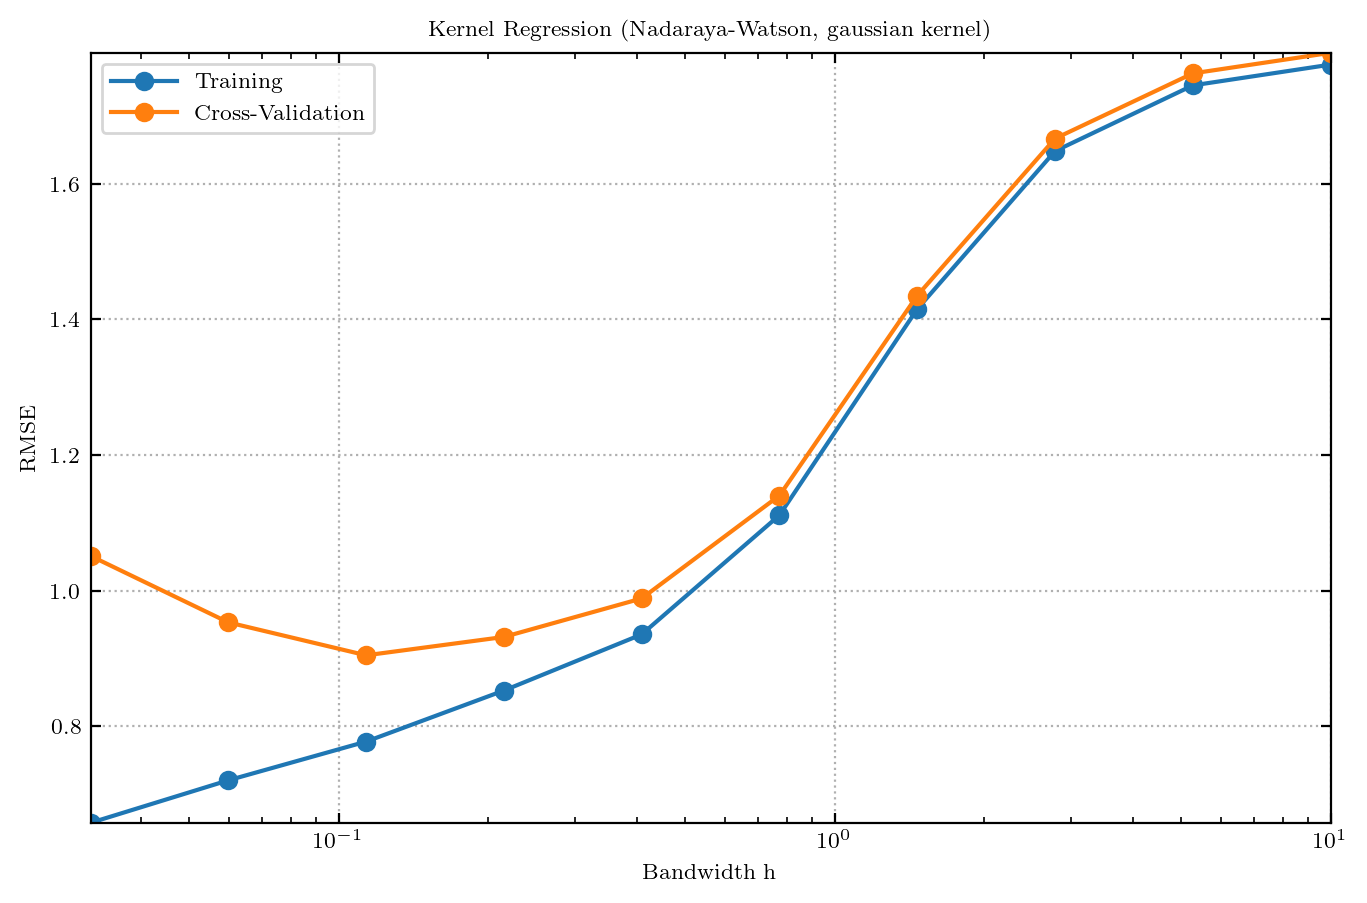

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from astroML.linear_model import NadarayaWatson

X = z_sample_
y = mu_sample

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Diverse ampiezze del kernel gaussiano
bandwidths = np.logspace(-1.5, 1.0, 10)  # da 0.03 a 10 circa
rmse_train = []
rmse_cv = []

for h in bandwidths:
    model = NadarayaWatson(kernel='gaussian', h=h)
    model.fit(X_scaled, y)
    
    y_pred_train = model.predict(X_scaled)
    rmse_train.append(np.sqrt(mean_squared_error(y, y_pred_train)))
    
    # Cross-validation
    y_pred_cv = cross_val_predict(model, X_scaled, y, cv=10)
    rmse_cv.append(np.sqrt(mean_squared_error(y, y_pred_cv)))

plt.figure(figsize=(8, 5))
plt.plot(bandwidths, rmse_train, 'o-', label='Training')
plt.plot(bandwidths, rmse_cv, 'o-', label='Cross-Validation')
plt.xscale('log')
plt.xlabel('Bandwidth h')
plt.ylabel('RMSE')
plt.title('Kernel Regression (Nadaraya-Watson, gaussian kernel)')
plt.legend()
plt.grid(True)
plt.show()
